In [62]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


Replacing 'TimeToSubway' column to avarage time it takes to the subway, if the value is 'no_bus_stop_nerby' assuming the building is far from any bus stop so turn the value of that to 50 or 50 minutes. the main goal is to actually replace a messy object column to numeric without needing it to encode

In [63]:
mapping_time_to_subway = {
    '0-5min': 5,
    '5min~10min': 7.5,
    '10min~15min': 12.5,
    '15min~20min': 17.5,
    'no_bus_stop_nearby': 50
}
df['TimeToSubway'] = df['TimeToSubway'].map(mapping_time_to_subway)
df['TimeToSubway'].unique()


array([ 5. , 12.5, 17.5,  7.5, 50. ])

Renaming the 'YearBuilt' to 'AgeOfBuilding' and changing the value of it with its actual age of the building rather the year it was build. the goal is try not to encode it for preprocessing


In [66]:
df = df.rename(columns={'YearBuilt': 'AgeOfBuilding'})
df['AgeOfBuilding'] = 2025 - df['AgeOfBuilding']
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),AgeOfBuilding,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,5.0,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,18,10,1387,346017
1,terraced,12.5,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,39,4,914,150442
2,mixed,17.5,Chil-sung-market,1.0,7.0,3.0,56.0,28,5,558,61946
3,mixed,7.5,Bangoge,5.0,5.0,4.0,798.0,20,7,914,165486
4,terraced,5.0,Sin-nam,0.0,1.0,2.0,536.0,19,5,1743,311504


Adding two new features, 'TotalFacilityNearby' is the total of facilities nerby the building based on N_FacilitiesNearBy. 'FacilityScore' is adding new feature of weighted which facilies are near the building.
the weight are distributed like this:
ETC or othe facilities = 0.5
PublicOffice = 1.5
Universities = 2
(Univiersities usually matter more)

In [68]:
df['TotalFacilityNearby'] = df['N_FacilitiesNearBy(ETC)'] + df['N_FacilitiesNearBy(PublicOffice)'] + df['N_SchoolNearBy(University)']
df['FacilityScore'] = (df['N_FacilitiesNearBy(ETC)'] * 0.5) +(df['N_FacilitiesNearBy(PublicOffice)'] * 1.5) + (df['N_SchoolNearBy(University)'] * 2)
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),AgeOfBuilding,N_FacilitiesInApt,Size(sqf),SalePrice,TotalFacilityNearby,FacilityScore
0,terraced,5.0,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,18,10,1387,346017,5.0,8.5
1,terraced,12.5,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,39,4,914,150442,7.0,10.0
2,mixed,17.5,Chil-sung-market,1.0,7.0,3.0,56.0,28,5,558,61946,11.0,17.0
3,mixed,7.5,Bangoge,5.0,5.0,4.0,798.0,20,7,914,165486,14.0,18.0
4,terraced,5.0,Sin-nam,0.0,1.0,2.0,536.0,19,5,1743,311504,3.0,5.5


Adding Binary feature for 'HasParking'

In [71]:
df['HasParking'] = np.where(df['N_Parkinglot(Basement)'] > 0, 1, 0)
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),AgeOfBuilding,N_FacilitiesInApt,Size(sqf),SalePrice,TotalFacilityNearby,FacilityScore,HasParking
0,terraced,5.0,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,18,10,1387,346017,5.0,8.5,1
1,terraced,12.5,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,39,4,914,150442,7.0,10.0,0
2,mixed,17.5,Chil-sung-market,1.0,7.0,3.0,56.0,28,5,558,61946,11.0,17.0,1
3,mixed,7.5,Bangoge,5.0,5.0,4.0,798.0,20,7,914,165486,14.0,18.0,1
4,terraced,5.0,Sin-nam,0.0,1.0,2.0,536.0,19,5,1743,311504,3.0,5.5,1


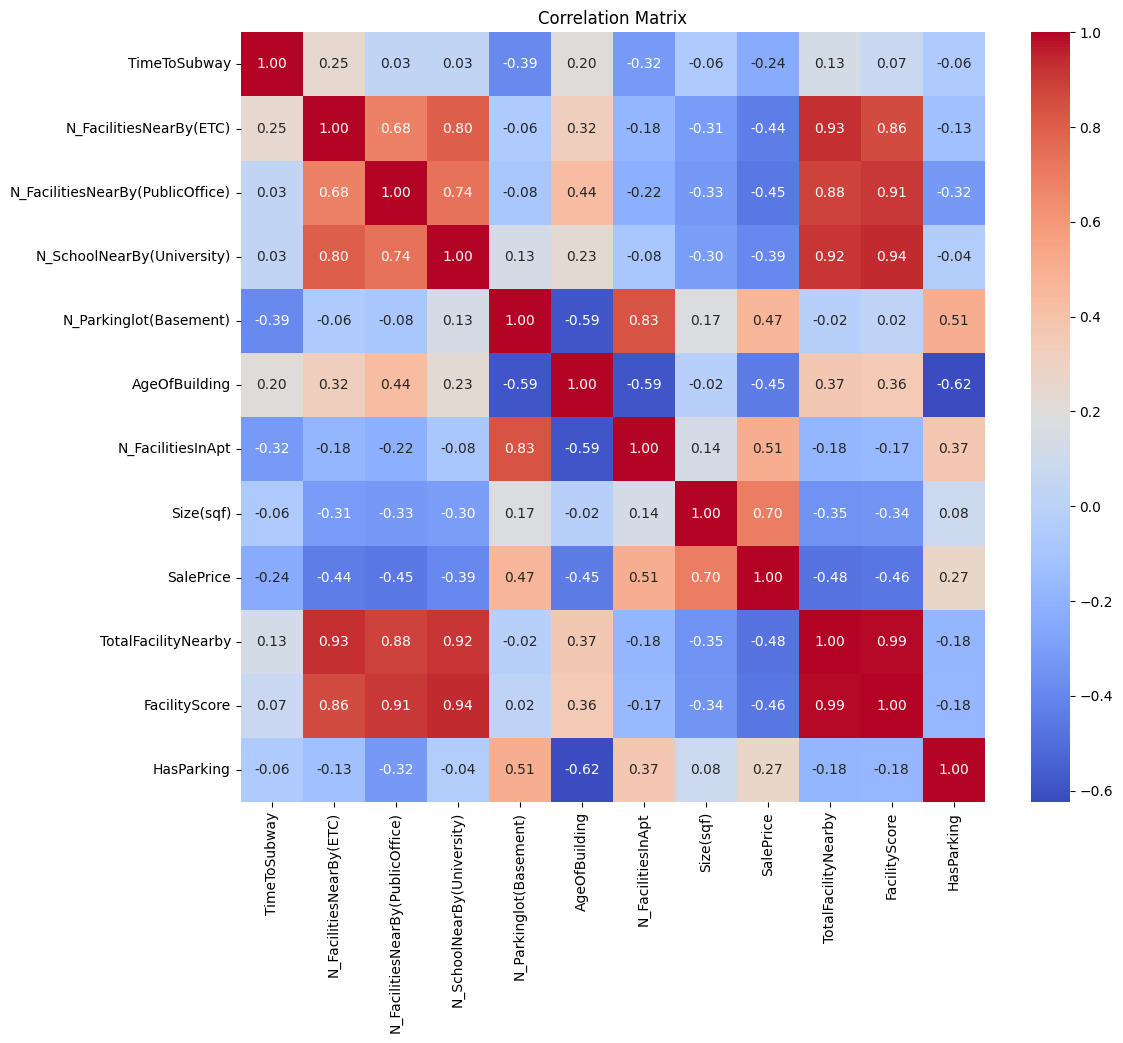

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [76]:
df.to_csv('daegu_apart_preprocessed.csv', index=False)